<a href="https://colab.research.google.com/github/maingga/PCVK_RPL_2024/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan nilai Gamma: 3


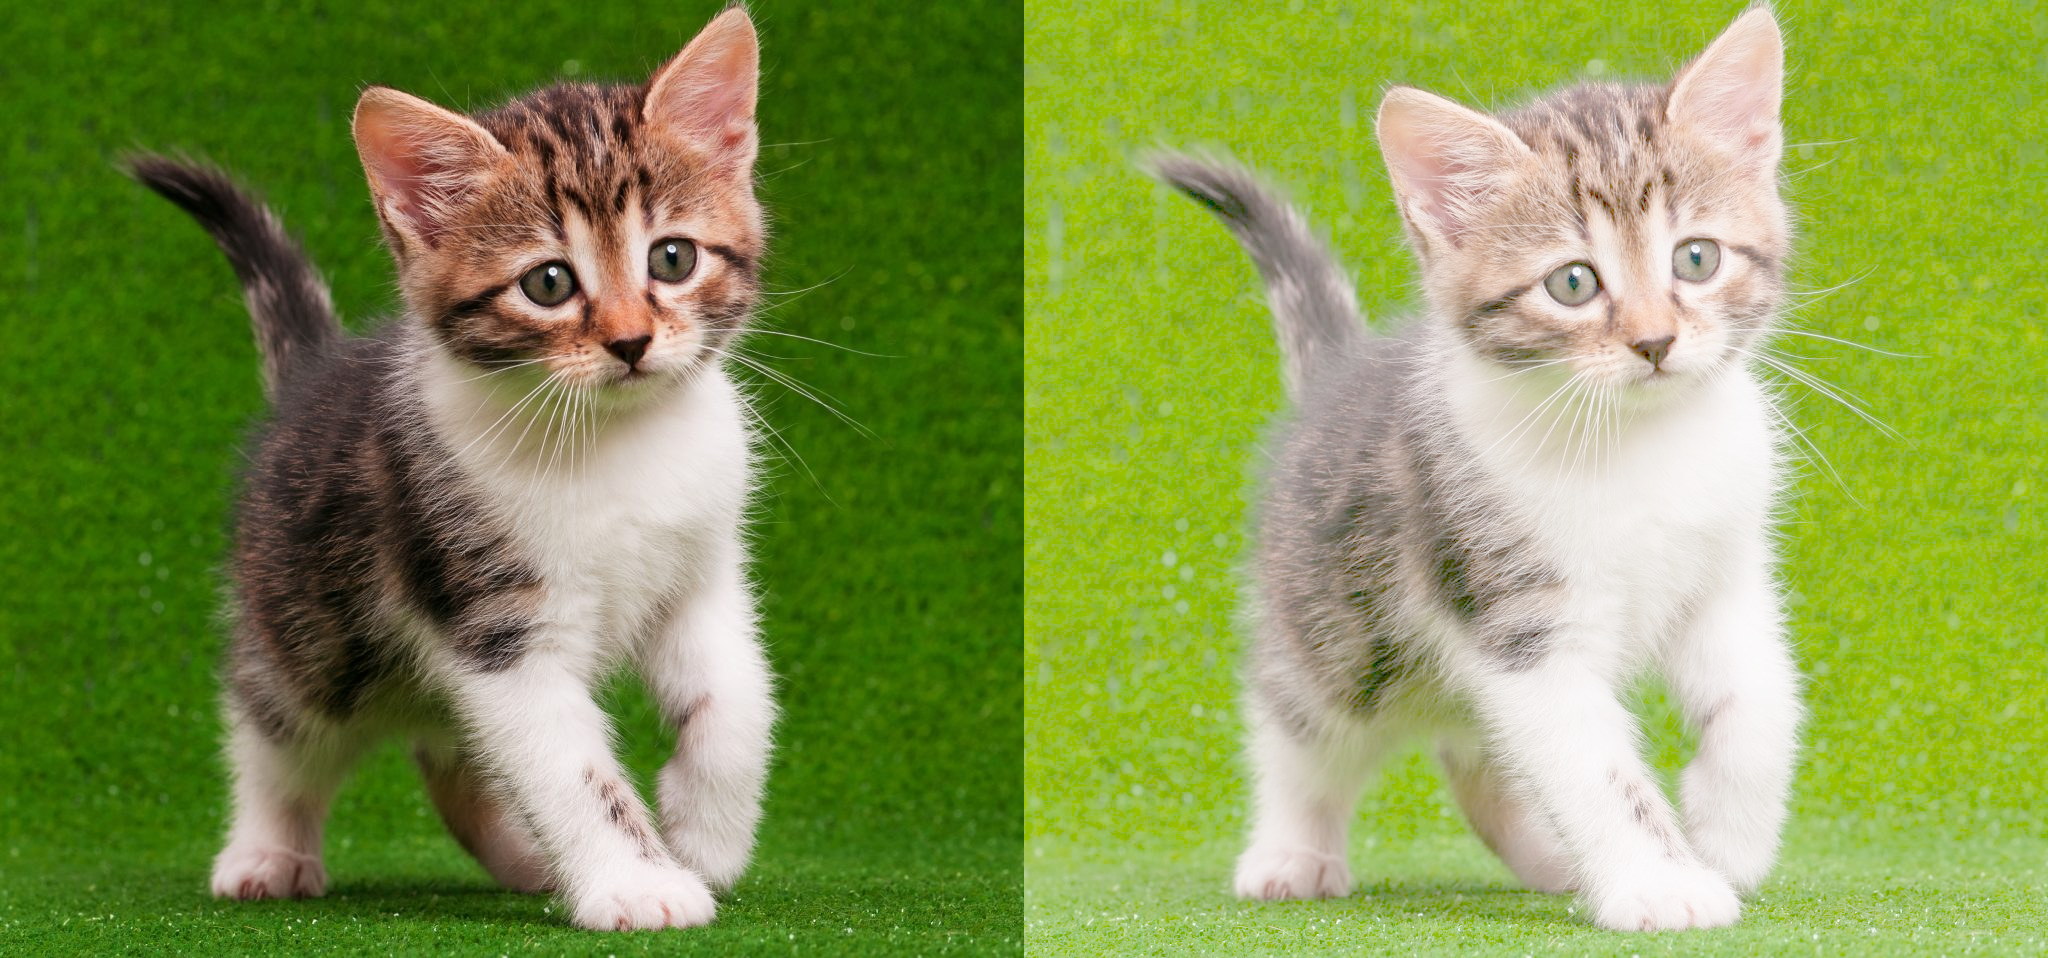

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
img = cv.imread('kitten01.jpg')
gamma = float(input("Masukkan nilai Gamma: "))

# Gamma Correction
gamma_corrected = np.array(255 * (img / 255) ** (1 / gamma), dtype='uint8')

# Menggabungkan gambar "before" dan "after" secara horizontal
combined_image = np.hstack((img, gamma_corrected))

# Menampilkan gambar gabungan menggunakan cv2_imshow
cv2_imshow(combined_image)


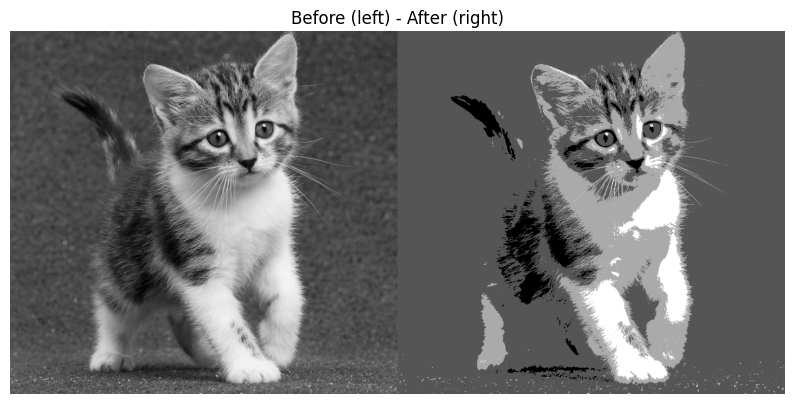

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Mengatur bit depth dan level
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar asli dalam mode grayscale
img = cv.imread('kitten01.jpg', cv.IMREAD_GRAYSCALE)

# Mengatur bit depth pada gambar
depth_image = np.zeros(img.shape, img.dtype)
depth_image = np.round(img / level) * level
depth_image = depth_image.astype(np.uint8)

# Menggabungkan gambar before dan after
combined_image = np.hstack((img, depth_image))

# Menampilkan gambar before (kiri) dan after (kanan)
plt.figure(figsize=(10, 5))
plt.imshow(combined_image, cmap='gray')
plt.title('Before (left) - After (right)')
plt.axis('off')
plt.show()


No	Jumlah Citra di Average	PSNR (dB)
5	5			27.77
10	10			27.97
20	20			27.97
40	40			28.10
80	80			28.22
100	100			28.27


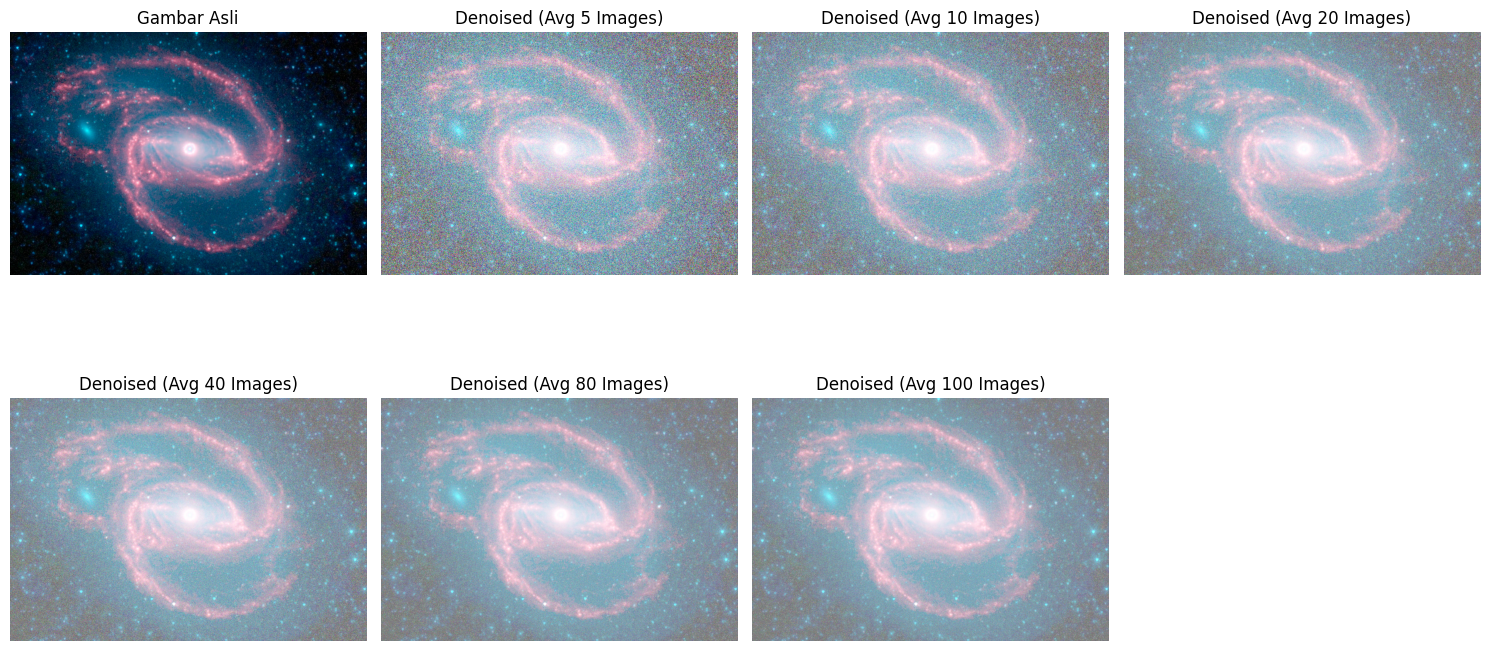

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
original = cv.imread('galaxy.jpg')  # Gambar asli
if original is None:
    print("Gambar asli tidak ditemukan!")
    exit()

# Fungsi untuk menambahkan Gaussian Noise
def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv.add(image, noise)
    return noisy_image

# Menghitung Average Denoising
def average_denoising(images):
    avg_image = np.mean(images, axis=0)
    avg_image = np.round(avg_image).astype(np.uint8)
    return avg_image

# Menghitung PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, PSNR dianggap sangat tinggi
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Membuat daftar gambar berisik
noisy_images = []
num_noisy_images = 100  # Jumlah gambar yang akan dibuat
for _ in range(num_noisy_images):
    noisy_image = add_gaussian_noise(original)
    noisy_images.append(noisy_image)

# Menyimpan hasil PSNR untuk setiap jumlah citra yang diaverage
psnr_results = []
denoised_images = []  # Menyimpan citra yang telah di-denoise untuk ditampilkan

# Melakukan average denoising untuk berbagai jumlah citra
for num_images in [5, 10, 20, 40, 80, 100]:
    if num_images <= len(noisy_images):
        denoised_image = average_denoising(noisy_images[:num_images])
        psnr_value = calculate_psnr(original, denoised_image)
        psnr_results.append((num_images, psnr_value))
        denoised_images.append(denoised_image)  # Simpan citra denoised

# Menampilkan hasil PSNR
print("No\tJumlah Citra di Average\tPSNR (dB)")
for num_images, psnr_value in psnr_results:
    print(f"{num_images}\t{num_images}\t\t\t{psnr_value:.2f}")

# Menampilkan gambar asli dan gambar denoised
plt.figure(figsize=(15, 8))

# Menampilkan gambar asli
plt.subplot(2, 4, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan gambar denoised untuk setiap jumlah citra
for i, denoised_image in enumerate(denoised_images):
    plt.subplot(2, 4, i + 2)
    plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))  # Konversi BGR ke RGB
    plt.title(f'Denoised (Avg {psnr_results[i][0]} Images)')
    plt.axis('off')

plt.tight_layout()
plt.show()


penggunaan average denoising dengan menambah jumlah citra berisik terbukti efektif dalam meningkatkan kualitas gambar dan menurunkan noise, yang dapat dilihat dari peningkatan nilai PSNR seiring bertambahnya jumlah citra yang digunakan. Pendekatan ini sangat berguna dalam berbagai aplikasi pengolahan citra.

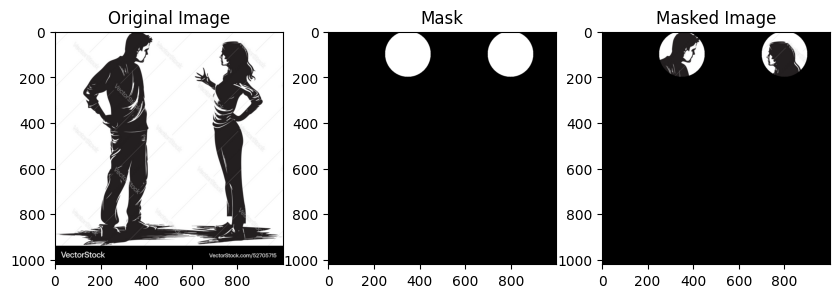

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('couple.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create masks for the two faces
mask1 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask1, (350, 100), 100, 255, -1)  # Position on the left face

mask2 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask2, (800, 100), 100, 255, -1)  # Position on the right face

# Combine the masks
combined_mask = cv2.bitwise_or(mask1, mask2)

# Apply the combined mask to the image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

# Display the images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()


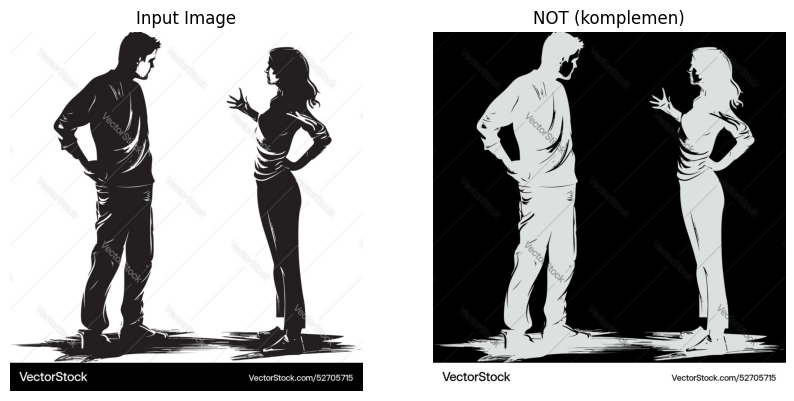

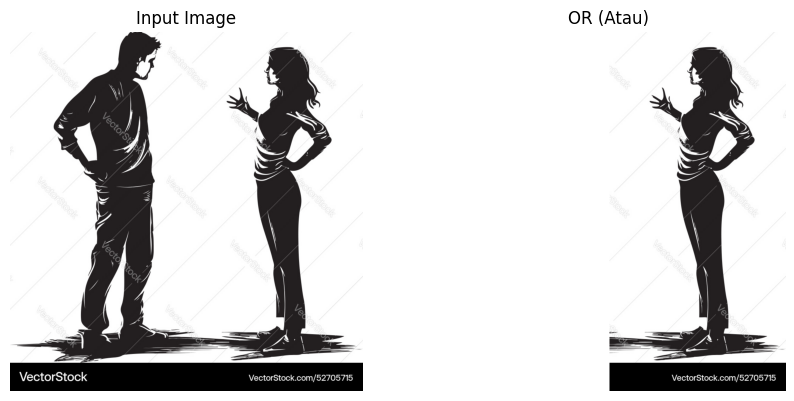

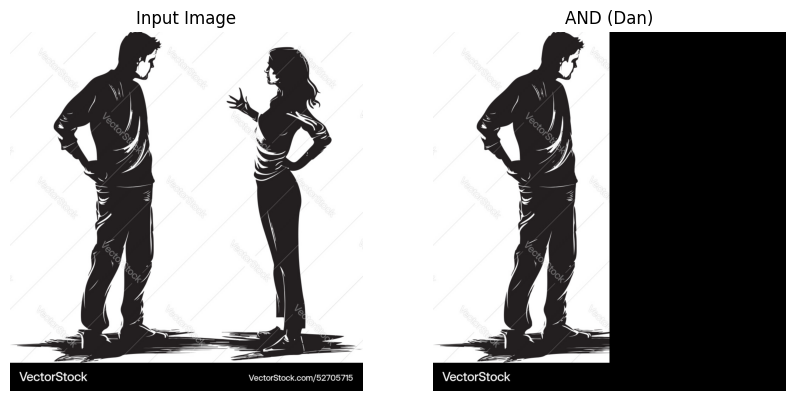

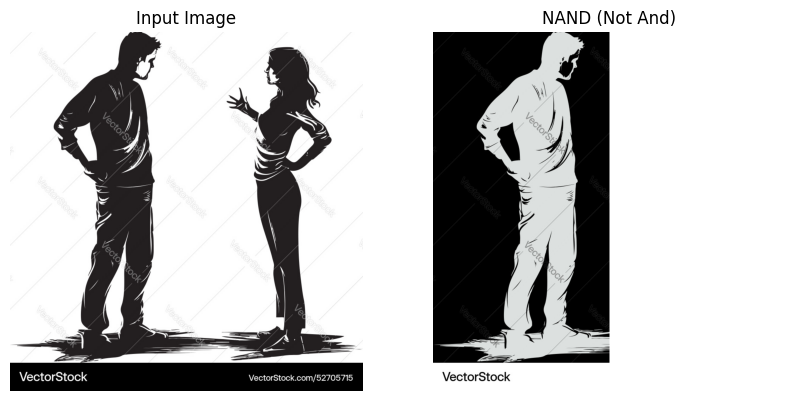

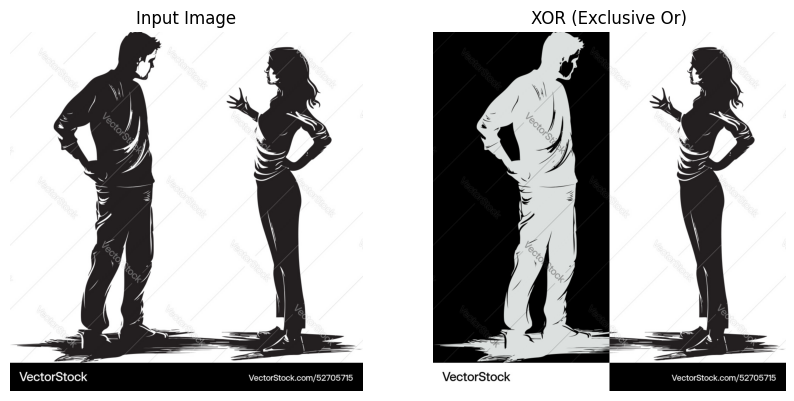

In [ ]:
def show_images(title1, image1, title2, image2):
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title(title1), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title(title2), plt.axis('off')
    plt.show()

img = cv2.imread('couple.jpg')

mask = np.zeros(img.shape, dtype=np.uint8)
mask[:, :img.shape[1]//2] = 255

not_img = cv2.bitwise_not(img)
or_img = cv2.bitwise_or(img, mask)
and_img = cv2.bitwise_and(img, mask)
nand_img = cv2.bitwise_not(cv2.bitwise_and(img, mask))
xor_img = cv2.bitwise_xor(img, mask)

show_images("Input Image", img, "NOT (komplemen)", not_img)
show_images("Input Image", img, "OR (Atau)", or_img)
show_images("Input Image", img, "AND (Dan)", and_img)
show_images("Input Image", img, "NAND (Not And)", nand_img)
show_images("Input Image", img, "XOR (Exclusive Or)", xor_img)